<a href="https://colab.research.google.com/github/kyoungkyoung/pytorch/blob/main/cats_vs_dogs_softmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
KAGGLE_UPLOAD = False

if KAGGLE_UPLOAD:
    # /content/ 폴더에 kaggle.json을 업로드 (매번 colab노트북 생성시 반복)
    from google.colab import files
    files.upload()
else:
    kaggle_usernamme = 'wonkyoungjang'
    from google.colab import userdata
    kaggle_key = userdata.get(kaggle_usernamme)

In [2]:
import json
import os

def create_kaggle_json(username, key, file_path):
    # 데이터 생성
    kaggle_data = {
        "username": username,
        "key": key
    }

    # JSON 파일로 저장
    with open(file_path, 'w') as json_file:
        json.dump(kaggle_data, json_file)

    print(f"kaggle.json 파일이 '{os.path.abspath(file_path)}' 경로에 생성되었습니다.")



# kaggle.json 파일 생성 함수 호출
if KAGGLE_UPLOAD==False:
    # 사용자 정보 입력
    key = kaggle_key  # 여기에 key값을 입력하세요
    filename = 'kaggle.json'
    create_kaggle_json(kaggle_usernamme, key, filename)

kaggle.json 파일이 '/content/kaggle.json' 경로에 생성되었습니다.


In [4]:
# /content 폴더에 kaggle.json 파일 업로드
# from google.colab import files
# files.upload()

In [5]:
# /root 에 .kaggle이 있으면 지워라
# !rm -rf /root/.kaggle

In [6]:
# kaggle.json 파일은 반드시 .kaggle 폴더 안에 업로드 시켜줘야 함
import os, shutil

os.makedirs('/root/.kaggle', exist_ok=True)
path = os.getcwd()

# 파일 복사 -> 이미 복사된 경우에는 복사하지 않는다
# 만약 /root/.kaggle/kaggle.json 이 존재하지 않는다면
# /root/.kaggle 디렉토리에 kaggle.json을 복사
if not os.path.exists(os.path.join('/root/.kaggle','kaggle.json')):
    src = os.path.join(os.getcwd(), 'kaggle.json')
    dst = os.path.join('/root/.kaggle', 'kaggle.json')
    shutil.copy(src,dst)
    print('/root/.kaggle/kaggle.json 파일 복사 완료!')
else:
    print('/root/.kaggle/kaggle.json 파일이 이미 존재합니다.')


# exist_ok=True
# - 디렉토리 생성 시, 해당 경로에 파일이 이미 존재하더라도 에러를 발생시키지 않는다.

# mkdir
# - 경로 중간에 디렉토리가 존재하지 않으면 FileNotFoundError를 발생시킵니다.
# - 이미 디렉토리가 존재하면 FileExistsError를 발생시킵니다.

# makedirs
# - 경로 중간에 디렉토리가 존재하지 않으면 해당 디렉토리까지 생성합니다.
# - exist_ok=True 옵션을 사용하면, 이미 디렉토리가 존재해도 에러를 발생시키지 않습니다.

# os.path.exists()
# - isexist() 는 python 모듈에서 존재하지 않는 함수!!


/root/.kaggle/kaggle.json 파일 복사 완료!


In [7]:
# 파일 확인

# 1. 숨김파일을 포함판 파일 리스트 return
!ls -a /root/.kaggle
print("\n")

# 2. 숨김파일을 제외한 파일 리스트 return + 상세정보
!ls -l /root/.kaggle
print("\n")

# 3. 숨김파일을 포함한 파일 리스트 return + 상세정보
!ls -al /root/.kaggle

.  ..  kaggle.json


total 4
-rw-r--r-- 1 root root 72 Oct  4 02:01 kaggle.json


total 16
drwxr-xr-x 2 root root 4096 Oct  4 02:01 .
drwx------ 1 root root 4096 Oct  4 02:01 ..
-rw-r--r-- 1 root root   72 Oct  4 02:01 kaggle.json


In [8]:
# kaggle에서 데이터 가져오기

!chmod 600 /root/.kaggle/kaggle.json
!kaggle competitions download -c dogs-vs-cats

100% 812M/812M [00:10<00:00, 61.5MB/s]
100% 812M/812M [00:10<00:00, 80.2MB/s]


In [9]:
# 압축파일 풀기 -> /content/data 폴더에 압축 풀기
!unzip -qq dogs-vs-cats.zip -d data

# unzip : 압축 해제를 위한 명령어
# -qq : 가장 조용한 모드로 실행 -> 압축 해제 과정 중 어떠한 메시지도 출력하지 않습니다.
# dogs-vs-cats.zip : 해제할 압축 파일의 이름
# -d data : 압축 해제된 파일들을 저장할 디렉토리를 지정 -> 여기서는 data 디렉토리에 저장됩니다.
#           만약 data 디렉토리가 없다면, unzip 명령어 실행 중에 자동으로 생성됩니다.

In [10]:
# 절대경로가 /content/data 인 data 폴더 안에 있는 파일 리스트 출력
# !ls /content/data/
!ls data/

sampleSubmission.csv  test1.zip  train.zip


In [11]:
import zipfile

# dataPath = /content/data
dataPath = os.path.join(os.getcwd(), 'data')

# zipfile.ZipFile(zip파일이 있는 경로) -> 매개변수(생성자)로 zip파일이 있는 경로를 전달해준다.
train_zip_file = zipfile.ZipFile(os.path.join(dataPath, 'train.zip'))
train_zip_file.extractall(path=dataPath)
train_zip_file.close()

test_zip_file = zipfile.ZipFile(os.path.join(dataPath, 'test1.zip'))
test_zip_file.extractall(path=dataPath)
test_zip_file.close()


# /content/data/train.zip 경로에 있는 train.zip 파일을 열고, 이후에 압축 해제, 파일 목록 확인, 파일 읽기 등의 작업을 수행할 수 있도록 준비하는 역할을 합니다.

In [12]:
# 데이터 갯수 확인
train_data = os.path.join(dataPath, 'train')
test_data = os.path.join(dataPath, 'test1')

# os.listdir(디렉토리명) : 해당 디렉토리 안의 파일명들을 list로 return
trainFiles = os.listdir(train_data)
testFiles = os.listdir(test_data)

print('train 데이터 갯수 : ', len(trainFiles))
print('test 데이터 갯수 : ', len(testFiles))

train 데이터 갯수 :  25000
test 데이터 갯수 :  12500


In [13]:
import random
train_num = random.randint(0, len(trainFiles))
print(trainFiles[train_num])

test_num = random.randint(0, len(testFiles))
print(testFiles[test_num])

cat.1375.jpg
407.jpg


In [14]:
# cat data와 dog data 가 각각 12,500개 인지 확인 -> 이 리스트는 오로지 데이터 갯수 확인용! -> shutil.copy()로 사용할 수 없음

train_cat_chk_list = []
train_dog_chk_list = []

for i in range(len(trainFiles)):
    cat_or_dog = trainFiles[i].split('.')[0]
    # print(cat_or_dog)

    if cat_or_dog == 'cat':
        train_cat_chk_list.append(trainFiles[train_num])
    elif cat_or_dog == 'dog':
        train_dog_chk_list.append(trainFiles[train_num])
    else:
        print('cat or dog가 아님!!')

print(len(train_cat_chk_list))
print(len(train_dog_chk_list))

12500
12500


In [15]:
# 이미지 분류 레이블 만들기
# cat의 레이블 : 0 / dog의 레이블 : 1 -> 이렇게 지정해서 이미지 분류 레이블 설정

# 1. 폴더로 클래스를 나누는 방법 : 폴더명을 레이블로 사용하는 방법
# 2. csv파일 만들기 : csv 파일의 컬럼 2개 (column1: 파일명, column2: 레이블)

# 총 train_data(cat + dog)는 25,000개 -> 이걸 한번에 돌리면 데이터가 너무 많아서 시간이 오래 걸림
# train_data를 4,000개만 사용 -> cat 2,000장 / dog 2,000장
# train_data는 train + valid 라고 생각하면 됨
# train_cat : 1,000
# train_dog : 1,000
# valid_cat : 500
# valid_dog : 500

# train과 valid의 차이점
# train (학습)
#  - 모델이 학습 하는 데이터 => 문제와 답안지를 같이 줌
#  - train을 통해 가중치(w)값, 편향(b)값을 구함

# valid (모의고사)
#  - 모델이 학습하지 않고 시험을 보는 데이터 => 문제와 답안지를 주긴 하지만 train 처럼 모델 학습에 사용하진 않음
#  - valid 값을 통해서 나온 loss나 accuracy 값으로 하이퍼파라미터를 튜닝
#  - 학습 결과에는 영향을 미치지 않음

# 하이퍼파라미터
#  - 내가 '직접' 조절해 주는 값
#  - 가중치(w), 편향(b)과 같은 값은 모델이 학습해서 알아서 튜닝해 주는 값 -> 이건 하이퍼파라미터가 아님
#  - LR(Learning Rate), EPOCH(횟수), batch_size(배치사이즈)와 같이 직접 수정해줄수 있는 값

In [16]:
# 스몰 데이터셋 폴더 삭제
!rm -rf data/small

In [17]:
# train / valid data

# shutil.copy()를 쓰려면 src 경로를 넣어줘야 함
import shutil

# 원천데이터
# dataPath = /content/data
train_data = os.path.join(dataPath, 'train')

trainFiles = os.listdir(train_data)

# train_cat : 1,000
# train_dog : 1,000
# valid_cat : 500
# valid_dog : 500

# /content/data/small
small_data = os.path.join(dataPath, 'small')
os.makedirs(small_data, exist_ok=True)

# 스몰 데이터셋에 copy할 train 디렉토리 생성
os.makedirs(os.path.join(small_data, 'train/cat'), exist_ok=True)
os.makedirs(os.path.join(small_data, 'train/dog'), exist_ok=True)

# 스몰 데이터셋에 copy할 valid 디렉토리 생성
os.makedirs(os.path.join(small_data, 'valid/cat'), exist_ok=True)
os.makedirs(os.path.join(small_data, 'valid/dog'), exist_ok=True)

# train / valid 스몰 데이텃셋에 원천 데이터 copy
cat_cnt = 0
dog_cnt = 0

for i in range(len(trainFiles)):

    cat_or_dog = trainFiles[i].split('.')[0]

    if cat_or_dog == 'cat' and cat_cnt < 1000:
        shutil.copy(os.path.join(train_data, trainFiles[i]), os.path.join(small_data, 'train/cat'))
        cat_cnt += 1

    elif cat_or_dog == 'cat' and cat_cnt < 1500:
        shutil.copy(os.path.join(train_data, trainFiles[i]), os.path.join(small_data, 'valid/cat'))
        cat_cnt += 1

    elif cat_or_dog == 'cat' and cat_cnt >= 1500:
        pass

    elif cat_or_dog == 'dog' and dog_cnt < 1000:
        shutil.copy(os.path.join(train_data, trainFiles[i]), os.path.join(small_data, 'train/dog'))
        dog_cnt += 1

    elif cat_or_dog == 'dog' and dog_cnt < 1500:
        shutil.copy(os.path.join(train_data, trainFiles[i]), os.path.join(small_data, 'valid/dog'))
        dog_cnt += 1

    elif cat_or_dog == 'dog' and dog_cnt >= 1500:
        pass

    elif cat_cnt >= 1500 and dog_cnt >= 1500:
        break

print("train data의 스몰 데이터셋 을 위한 폴더 지정 및 데이터 저장 완료!!")

train data의 스몰 데이터셋 을 위한 폴더 지정 및 데이터 저장 완료!!


In [18]:
# test data

import shutil

# 원천데이터
# dataPath = /content/data
test_data = os.path.join(dataPath, 'test1')

trainFiles = os.listdir(test_data)

# test_data : 1,000

# /content/data/small
small_data = os.path.join(dataPath, 'small')

# 스몰 데이터셋에 copy할 test 디렉토리 생성
os.makedirs(os.path.join(small_data, 'test'), exist_ok=True)

# test 스몰 데이텃셋에 원천 데이터 copy
for i in range(1000):
    shutil.copy(os.path.join(test_data, os.listdir(test_data)[i]), os.path.join(small_data, 'test'))

In [19]:
# 스몰 데이터셋 확인
print(len(os.listdir(os.path.join(small_data, 'train/cat'))))
print(len(os.listdir(os.path.join(small_data, 'train/dog'))))
print(len(os.listdir(os.path.join(small_data, 'valid/cat'))))
print(len(os.listdir(os.path.join(small_data, 'valid/dog'))))
print(len(os.listdir(os.path.join(small_data, 'test'))))

1000
1000
500
500
1000


In [20]:
os.listdir(os.path.join(small_data,'train/cat'))[3]

'cat.12455.jpg'

In [21]:
os.path.join(small_data,'train/cat')

# train, valid, test data_path 변수로 정의
train_cat_data_path = os.path.join(small_data, 'train/cat')
train_dog_data_path = os.path.join(small_data, 'train/dog')

valid_cat_data_path = os.path.join(small_data, 'valid/cat')
valid_dog_data_path = os.path.join(small_data, 'valid/dog')

test_data_path = os.path.join(small_data, 'test')

In [22]:
# train, valid, test 폴더의 파일 리스트 변수로 정의
train_cat_listdir = os.listdir(train_cat_data_path)
train_dog_listdir = os.listdir(train_dog_data_path)

valid_cat_listdir = os.listdir(valid_cat_data_path)
valid_dog_listdir = os.listdir(valid_dog_data_path)

test_listdir = os.listdir(test_data_path)

In [23]:
# customDataset() 클래스를 만들기 전, label을 붙이기 위해 해당 디렉토리의 데이터 클래스 값을 가져와서 클래스별로 label을 붙여준다.
if 'cat' in train_cat_listdir[0]:
    print('cat')
else:
    print('dog')

cat


array([[[72, 80, 80],
        [73, 81, 81],
        [73, 81, 81],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[73, 81, 81],
        [73, 81, 81],
        [73, 81, 81],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[73, 81, 81],
        [74, 82, 82],
        [74, 82, 82],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       ...,

       [[51, 53, 53],
        [51, 53, 53],
        [51, 53, 53],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[51, 53, 53],
        [50, 52, 52],
        [50, 52, 52],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[50, 52, 52],
        [50, 52, 52],
        [50, 52, 52],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]]], dtype=uint8)
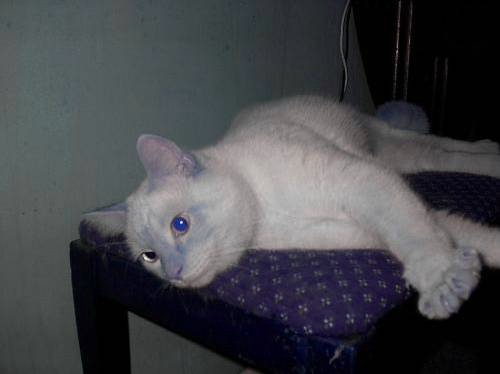

In [24]:
# 데이터 확인 해보기
import cv2
# img = cv2.imread('/content/data/small/train/cat/cat.10018.jpg')
# small_train_cat_list = os.listdir(os.path.join(small_data,'train/cat'))
img = cv2.imread(os.path.join(train_cat_data_path,os.listdir(train_cat_data_path)[0]))
img

In [25]:
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import numpy as np

# customDataset 클래스를 만들어서 데이터 전처리 실행
class customDataset(Dataset):
    def __init__(self, files, root_dir, mode, transform=None):
        self.files = files
        self.root_dir = root_dir
        self.mode = mode
        self.transform = transform

        # files = train_cat_listdir / train_dog_listdir
        # files에 들어오는 파일 리스트들은 모두 같은 label을 갖고 있기 때문에 files[0]으로 해도 상관없음
        # train_cat_listdir 은 전부 cat.0000.jpg -> files[0]이 모두 cat -> label = 0
        # train_dog_listdir 은 전부 dog.0000.jpg -> files[0]이 모두 dog -> label = 1
        # label 생성 -> cat=0, dog=1
        if 'dog' in files[0]:
            self.label = 1
        else:
            self.label = 0

    # return 파일 개수
    def __len__(self):
        return len(self.files)

    # return 값에 np.array()를 주는 이유
    # PyTorch는 텐서(Tensor)라는 데이터 구조를 사용하여 연산을 수행하는데 이를 위해
    # pytorch에서 효율적으로 처리할 수 있는 데이터인 numpy배열 형태로 값을 넘겨줌
    def __getitem__(self, idx):
        img_path = os.path.join(self.root_dir, self.files[idx])
        img = Image.open(img_path)

        if self.transform:
            img = self.transform(img)

        if self.mode == 'train':
            return img, np.array([self.label])

        else:
            if self.files[idx].split('.')[0] == 'dog':
                self.label = 1
            else:
                self.label = 0

            return img, np.array([self.label]), self.files[idx]

In [26]:
# customDataset 클래스를 만드는 대신
# ImageFolder 클래스를 상속받아 ImageFolderWithFilenames 클래스 만들어서 사용

# 원래 매직 메서드 사용할 때 -> 매직 메서드는 보통 객체[인덱스] 형태로 사용
# aa = ImageFolder()
# getitem(aa)


# super() 함수를 통해 부모 클래스의 매직 메서드를 호출할 때 -> 일반적인 방식(.메서드명()) 형태를 사용

# Python에서 부모 클래스의 메서드를 사용하고 싶을 때, 부모 클래스의 객체를 직접 생성하는 것이 아니라, super() 함수를 사용하는 것이 일반적
# super(ImageFolderWithFilenames, self)
#   - super() 함수의 첫 번째 인자로 자식 클래스(ImageFolderWithFilenames)를, 두 번째 인자로 self (자식 클래스 인스턴스)를 전달
#   - super() 함수는 ImageFolderWithFilenames 클래스의 부모 클래스(ImageFolder)의 메서드를 찾아서 호출

from torchvision.datasets import ImageFolder
from torchvision import transforms
import os

# Custom ImageFolder to return file name along with image and label
class ImageFolderWithFilenames(ImageFolder):
    def __getitem__(self, index):
        # 부모클래스의 __getitem__(index) 의 return 값을 그대로 가져옴
        # Get the original tuple (image, label)
        original_tuple = super(ImageFolderWithFilenames, self).__getitem__(index)

        # filepath
        # self.samples 는 이미지 파일 경로와 레이블 정보를 담고 있는 리스트
        path, _ = self.samples[index]

        # return iamge, label, filepath
        return original_tuple + (path)



In [27]:
# customDataset() 클래스에 파라미터 값을 넣어주기 위한 transform 정의

from torchvision import transforms

org_size = (256,256)
img_size = 224

# Compose([]) : Composes several transforms together.
# transforms (list of Transform objects): list of transforms to compose.
# Compose([]) 안에 list 형식으로 transform할 내용 작성
visual_transform = transforms.Compose([
    transforms.Resize(org_size),
    transforms.RandomHorizontalFlip(),
    # visual_transform은 보여주기 위한 것
    #   -> randomCrop을 적용해서 matplotlib으로 이미지를 보여줄 때, 이미지 사이즈를 동일하게 하기 위함이다
    #   -> plt.show()로 이미지 출력하면 동일한 사이즈의 이미지가 출력되는 것을 알 수 있다.
    transforms.RandomCrop(img_size),
    # transforms.ColorJitter(brightness=(0.8, 1.2), contrast=(0.7, 1.3), saturation=(0, 0.5), hue=(-0.1, 0.1)),
    transforms.ToTensor(),
])

train_transform = transforms.Compose([
    # 이미지 사이즈가 파일마다 제각각이기 때문에 파일들을 전부 동일한 이미지 사이즈로 변경해주기
    transforms.Resize(org_size),
    transforms.RandomHorizontalFlip(),

    # 데이터 증식을 위해 (256,256)의 이미지를 RandomCrop()을 통해 (224,224) 사이즈로 잘라준다.
    transforms.RandomCrop(img_size),

    # transforms.ColorJitter(brightness=0, contrast=0, saturation=0, hue=0)
    # 밝기 (brightness): 0 (변경 없음)
    # 대비 (contrast): 0 (변경 없음)
    # 채도 (saturation): 0 (변경 없음)
    # 색조 (hue): 0 (변경 없음)
    transforms.ColorJitter(brightness=(0.8, 1.2), contrast=(0.7, 1.3), saturation=(0, 0.5), hue=(-0.1, 0.1)),

    transforms.ToTensor(),

    # 평균이 0.5 표준편차 0.5 (0~1사이의 실수)
    # transforms.Normalize(mean, std) 함수는 이미지의 각 채널(R, G, B)별로 평균(mean)을 빼고 표준 편차(std)로 나누어 평균이 0, 표준 편차가 1인 분포로 변환합니다.
    # 평균(mean) = (0.5, 0.5, 0.5): R, G, B 각 채널의 평균을 0.5로 가정합니다.
    # 표준편차(std) = (0.5, 0.5, 0.5): R, G, B 각 채널의 표준 편차를 0.5로 가정합니다.
    # 빠른 학습: 모델이 더 빨리 수렴하고 학습 시간을 단축할 수 있습니다.
    # 안정적인 학습: 학습 과정이 더 안정적이고, 발산 가능성을 줄입니다.
    # 향상된 성능: 모델의 일반화 성능을 향상시켜 더 나은 예측 결과를 얻을 수 있습니다.
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

test_transform = transforms.Compose([
    transforms.Resize(org_size),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

In [28]:
# # visual, train, valid, test 데이터를 customDataset에 넣어서 customDataset() 객체 생성
# visual_dog_dataset = customDataset(train_dog_listdir, train_dog_data_path, 'train', visual_transfrom)
# visual_cat_dataset = customDataset(train_cat_listdir, train_cat_data_path, 'train', visual_transfrom)

# train_dog_dataset = customDataset(train_dog_listdir, train_dog_data_path, 'train', train_transform)
# train_cat_dataset = customDataset(train_cat_listdir, train_cat_data_path, 'train', train_transform)

# valid_dog_dataset = customDataset(valid_dog_listdir, valid_dog_data_path, 'train', test_transform)
# valid_cat_dataset = customDataset(valid_cat_listdir, valid_cat_data_path, 'train', test_transform)

# test_dataset = customDataset(test_listdir, test_data_path, 'test', test_transform)

In [29]:
# # ConcatDataset()으로 customDataset 합치기
# from torch.utils.data import ConcatDataset

# visual_concat_dataset = ConcatDataset([visual_dog_dataset, visual_cat_dataset])
# train_concat_dataset = ConcatDataset([train_dog_dataset, train_cat_dataset])
# valid_concat_dataset = ConcatDataset([valid_dog_dataset, valid_cat_dataset])

In [30]:
# ConcatDataset()으로 customDataset 합치기 -> 이것도 필요 없음
from torchvision.datasets import ImageFolder

visual_concat_dataset = ImageFolder(root=os.path.join(small_data, 'train'), transform=visual_transform)
train_concat_dataset = ImageFolder(root=os.path.join(small_data, 'train'), transform=train_transform)
valid_concat_dataset = ImageFolder(root=os.path.join(small_data, 'valid'), transform=test_transform)

# test_dataset = ImageFolderWithFilenames(root=os.path.join(small_data, 'test'), transform=test_transform)

In [31]:
visual_concat_dataset

Dataset ImageFolder
    Number of datapoints: 2000
    Root location: /content/data/small/train
    StandardTransform
Transform: Compose(
               Resize(size=(256, 256), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               RandomCrop(size=(224, 224), padding=None)
               ToTensor()
           )

In [32]:
# DataLoader()에 customDataset 넣어주기
# DataLoader()객체가 customDataset() 객체의 __getitem__(self, idx) 함수를 호출해서 해당 메서드의 return값을 가져온다.
from torch.utils.data import DataLoader

batch_size = 32
visual_data_loader = DataLoader(visual_concat_dataset, batch_size=batch_size, shuffle=True)
train_data_loader = DataLoader(train_concat_dataset, batch_size=batch_size, shuffle=True)
valid_data_loader = DataLoader(valid_concat_dataset, batch_size=batch_size, shuffle=True)

# test_data_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [33]:
len(train_data_loader)
visual_data_loader

In [34]:
# visual_data_loader (DataLoader 객체)
#   - 이미지와 레이블 데이터셋을 효율적으로 관리하고, 모델 학습에 사용할 배치 단위 데이터를 제공합니다.
#   - DataLoader는 데이터를 순차적으로 접근할 수 있도록 이터레이터(iterator)를 지원합니다.

# iter(visual_data_loader)
#   - visual_data_loader 객체에서 데이터를 순차적으로 가져올 수 있는 이터레이터를 생성합니다.
#   - 이터레이터는 현재 데이터의 위치를 기억하고, next() 함수를 통해 다음 데이터를 순차적으로 제공합니다.

# next(이터레이터)
#   - 이터레이터에서 다음 항목을 가져옵니다. 이터레이터의 끝에 도달하면 StopIteration 예외를 발생시킵니다.

# iter(visual_loader): visual_loader에서 데이터를 순회할 수 있는 이터레이터를 생성합니다.
# next(...): 생성된 이터레이터에서 다음 데이터 배치를 가져옵니다. 이때 데이터는 (images, labels) 형태의 튜플로 반환됩니다.
# images, labels = ...: 튜플에서 이미지 데이터는 images 변수에, 레이블 데이터는 labels 변수에 각각 할당됩니다.

# iter와 next를 사용하는 것은 for 문으로 데이터 로더를 순회하는 것과 동일한 효과를 냅니다. 다만, next를 사용하면 한 번에 하나의 배치만 가져올 수 있습니다.

# [ for문과의 차이점 ]
# next(iter(...)) 를 사용하든, for 문을 사용하든, visual_data_loader 는 한 번만 생성되고, 내부적으로 데이터를 순회하며 필요한 배치를 제공합니다.
# next(iter(...)): 한 번 호출할 때마다 DataLoader에서 다음 배치를 한 번 가져옵니다.
# for 문: DataLoader의 모든 데이터를 순회하며 각 배치를 순차적으로 처리합니다.

# next(iter(...)) 는 "다음 메뉴 하나 주세요" 라고 주문하는 것과 같습니다.
# for 문은 "메뉴판에 있는 모든 메뉴를 하나씩 주세요" 라고 주문하는 것과 같습니다.


images, labels = next(iter(visual_data_loader))

print(images, labels)

cnt=1
while cnt<3 :
    for batch_idx, (fimages, flabels) in enumerate(visual_data_loader):
        # 배치 단위로 처리
        print(f"Batch {batch_idx}:", f"fimages=> {fimages}, flabels => {flabels}")
        cnt+=1
        if cnt==3:
            break

# bath_size = 32 이므로 2000/32 = 62.5 => for문이 62.5번 돈다
# for batch_idx, (fimages, flabels) in enumerate(visual_data_loader):
#     # 배치 단위로 처리
#     print(f"Batch {batch_idx}:")
# print 값이 Batch 0 ~ Batch 62

tensor([[[[0.4353, 0.4314, 0.4471,  ..., 0.2039, 0.1882, 0.1922],
          [0.4392, 0.4235, 0.4275,  ..., 0.2078, 0.1961, 0.1961],
          [0.4392, 0.4275, 0.4039,  ..., 0.2078, 0.2078, 0.2000],
          ...,
          [0.7020, 0.6902, 0.7137,  ..., 0.6902, 0.6980, 0.6863],
          [0.7451, 0.7137, 0.6902,  ..., 0.7059, 0.7059, 0.7098],
          [0.6353, 0.6275, 0.6706,  ..., 0.7294, 0.7333, 0.7294]],

         [[0.4235, 0.4196, 0.4353,  ..., 0.1176, 0.1098, 0.1176],
          [0.4314, 0.4157, 0.4157,  ..., 0.1216, 0.1176, 0.1216],
          [0.4235, 0.4118, 0.3882,  ..., 0.1216, 0.1294, 0.1255],
          ...,
          [0.5098, 0.4863, 0.5451,  ..., 0.6980, 0.7020, 0.6902],
          [0.5451, 0.5020, 0.5137,  ..., 0.7137, 0.7098, 0.7137],
          [0.4157, 0.4196, 0.4941,  ..., 0.7412, 0.7373, 0.7294]],

         [[0.4863, 0.4824, 0.5020,  ..., 0.0510, 0.0510, 0.0588],
          [0.4902, 0.4706, 0.4745,  ..., 0.0510, 0.0588, 0.0627],
          [0.4863, 0.4706, 0.4471,  ..., 0

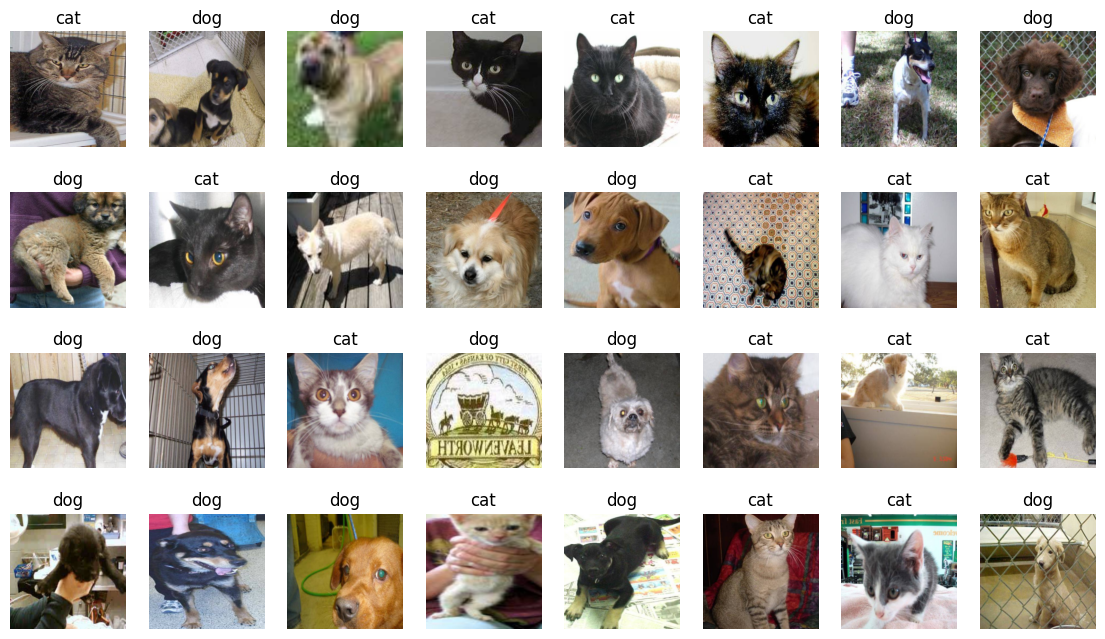

In [35]:
import matplotlib.pyplot as plt

images, labels = next(iter(visual_data_loader))

label_class = {0: 'cat', 1:'dog'}

fig = plt.figure(figsize=(14, 8))
for i in range(batch_size):
    # 4행 8열로 정렬
    # 1. subplot 생성: 4행 8열 그리드에서 i+1번째 위치에 subplot 생성
    ax = fig.add_subplot(4, 8, i+1)

    # labels[i]: i 번째 요소인 텐서를 가져옵니다. 이 텐서는 레이블 값 하나만 가지고 있더라도 여전히 텐서 형태입니다.
    # .item(): 텐서가 단일 값을 가지고 있을 때, 그 값을 Python 숫자(scalar) 형태로 추출합니다.
    # 1. if문
    # if labels[i].item() == 0 :
    #     ax.set_title('cat')
    # else:
    #     ax.set_title('dog')

    ax.set_title(label_class[labels[i].item()])

    # 3. 축 제거: 이미지만 보이도록 x, y 축 눈금과 레이블 제거
    ax.axis('off')

    # 4. 이미지 출력:
    #    - images[i]는 (C, H, W) 형태이므로 matplotlib에서 사용하는 (H, W, C) 형태로 변경
    #    - permute() 함수를 사용하여 (1, 2, 0) 순서로 차원 변경
    # permute(1, 2, 0) 은 PyTorch 텐서의 차원 순서를 matplotlib의 imshow() 함수가 요구하는 순서 (높이, 너비, 채널)에 맞게 변경하기 위해 사용됩니다.
    # permute(1, 2, 0) 의 파라미터값을 1,2,0 으로 쓰지않고 다른값을 쓰면 이미지가 제대로 표시되지 않는다.
    ax.imshow(images[i].permute(1,2,0))

plt.show()


In [36]:
import torch
# gpu 사용 설정

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [37]:
# model 생성 및 설정

import torch
from torchvision.models import resnet50, mobilenet_v3_large

# resnet50
# pretrained=True를 사용하면 ImageNet 데이터셋으로 미리 학습된 가중치를 사용하여 ResNet50 모델을 초기화합니다.
# pretrained=True 옵션을 주면 학습 시간을 단축하고, 데이터 효율성을 높이며, 초기화 문제를 완화하는 데 도움이 됩니다.
model = resnet50(pretrained=True).to(device)

# movilenet_v3_large
# model = mobilenet_v3_large(pretrained=True).to(device)
model

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 136MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [38]:
!pip install torchsummary
!pip install pytorch-ignite

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.7/312.7 kB 6.7 MB/s eta 0:00:00


In [39]:
from torchsummary import summary

summary(model, (3, 224, 224), batch_size=32, device='cuda')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [32, 64, 112, 112]           9,408
       BatchNorm2d-2         [32, 64, 112, 112]             128
              ReLU-3         [32, 64, 112, 112]               0
         MaxPool2d-4           [32, 64, 56, 56]               0
            Conv2d-5           [32, 64, 56, 56]           4,096
       BatchNorm2d-6           [32, 64, 56, 56]             128
              ReLU-7           [32, 64, 56, 56]               0
            Conv2d-8           [32, 64, 56, 56]          36,864
       BatchNorm2d-9           [32, 64, 56, 56]             128
             ReLU-10           [32, 64, 56, 56]               0
           Conv2d-11          [32, 256, 56, 56]          16,384
      BatchNorm2d-12          [32, 256, 56, 56]             512
           Conv2d-13          [32, 256, 56, 56]          16,384
      BatchNorm2d-14          [32, 256,

In [40]:
# 특징 추출기 생성
# fc
#  - ResNet50 모델의 마지막 레이어인 완전히 연결된 레이어(fully connected layer)를 나타냅니다.
#  - ResNet50은 이미지 분류를 위해 마지막에 완전히 연결된 레이어를 사용하여 최종 클래스 확률을 출력합니다.
# in_features:
#  - 완전히 연결된 레이어(fc)의 입력 채널 수를 나타내는 속성입니다.
#  - 즉, model.fc.in_features는 완전히 연결된 레이어 이전 레이어의 출력 특징 맵의 채널 수와 같습니다.


# model.fc
#  - 모델의 마지막 레이어인 fully connected layer의 정보를 나타낸다
#  - ImageNet 데이터셋을 학습한 ResNet50의 경우 위의 값을 print 해보면
#    Linear(in_features=2048, out_features=1000, bias=True) 이렇게 출력된다.
#  - 여기서 in_features=2048은 fc 레이어에 입력되는 특징(feature)수가 2048개 라는 뜻이고,
#    out_features=1000은 fc 레이어에서 출력되는 특징수가 1000개 라는 뜻이다.


# [ model.fc.in_features 코드를 사용하기 위해 ]
# ResNet50은 ImageNet 데이터셋의 1000개 클래스를 분류하도록 학습되었기 때문에, fc 레이어의 출력 크기는 1000입니다.
# 새로운 분류 작업을 수행하려면, fc 레이어의 입력 크기는 유지하면서 출력 크기를 새로운 클래스 수에 맞게 변경해야 합니다.
# model.fc.in_features를 통해 기존 fc 레이어의 입력 크기를 알아낸 후, 이를 새로운 fc 레이어에 연결합니다.


# torch.nn.Sequential() 은 PyTorch에서 제공하는 레이어를 담는 컨테이너라고 생각하면 됩니다.
# 마치 레고 블록을 순서대로 쌓아서 다양한 모양을 만드는 것처럼, torch.nn.Sequential() 을 사용하면 여러 레이어를 순서대로 연결하여 원하는 기능을 가진 모델을 만들 수 있습니다.
# 따라서 torch.nn.Sequential() 안에 3개, 4개, 또는 그 이상의 레이어를 자유롭게 추가하여 원하는 구조의 분류기를 만들 수 있습니다.
# 하지만, 레이어가 많아질수록 모델의 표현 능력은 향상될 수 있지만, 학습 시간이 길어지고 과적합(overfitting) 위험도 높아질 수 있습니다.


# 1. 특징 추출기(Feature Extractor)
#  - 역할: 입력 데이터(이미지, 텍스트 등)에서 **특징(feature)**을 추출하는 부분입니다.
#  - 구성: 주로 합성곱 레이어(Convolutional Layer), 풀링 레이어(Pooling Layer), 활성화 함수(Activation Function) 등으로 구성됩니다.
#  - 예시: ResNet, VGG, Inception과 같은 CNN 모델의 대부분은 이미지에서 특징을 추출하는 데 사용됩니다.
# 2. 분류기(Classifier)
#  - 역할: 특징 추출기에서 추출된 특징을 기반으로 데이터를 분류하는 부분입니다.
#  - 구성: 주로 완전히 연결된 레이어(Fully Connected Layer)와 활성화 함수(Activation Function)로 구성됩니다.
#  - 예시: 이진 분류 문제에서는 Sigmoid 함수를 사용하고, 다중 클래스 분류에서는 Softmax 함수를 사용합니다.
# 3. torch.nn.Sequential() 의 역할
#  - torch.nn.Sequential() 은 특징 추출기와 분류기를 순서대로 연결하여 하나의 모델로 만들 때 사용됩니다.
#  - torch.nn.Sequential() 안에 특징 추출에 사용되는 레이어들을 순서대로 넣으면 특징 추출기가 되고, 분류에 사용되는 레이어들을 넣으면 분류기가 됩니다.



# 예시:
# # 특징 추출기
# feature_extractor = torch.nn.Sequential(
#     torch.nn.Conv2d(...),
#     torch.nn.ReLU(),
#     torch.nn.MaxPool2d(...),
#     # ...
# )

# # 분류기
# classifier = torch.nn.Sequential(
#     torch.nn.Linear(...),
#     torch.nn.ReLU(),
#     torch.nn.Linear(...),
#     torch.nn.Sigmoid()
# )

# # 전체 모델
# model = torch.nn.Sequential(
#     feature_extractor,  # 특징 추출기
#     classifier  # 분류기
# )



# 활성화 함수
# ReLU(), Sigmoid(), Softmax()는 모두 딥러닝에서 자주 사용되는 활성화 함수이며, 특징 추출기와 분류기 부분 모두에서 사용될 수 있습니다.

# 1. 활성화 함수를 사용하는 이유
#  - 비선형성 도입: 활성화 함수는 모델에 비선형성을 도입하여 선형 모델로는 해결할 수 없는 복잡한 패턴을 학습할 수 있도록 합니다.
#  - 표현 능력 향상: 활성화 함수를 통해 각 레이어는 더 다양한 형태의 데이터 표현을 학습할 수 있으며, 이는 모델의 전반적인 성능 향상에 기여합니다.
# 2. 활성화 함수를 사용하지 않으면?
#  - 활성화 함수를 사용하지 않으면 딥러닝 모델은 여러 개의 선형 레이어를 연결한 것과 동일하게 되어, 단일 선형 레이어로 표현 가능한 모델과 동일한 성능을 갖게 됩니다. 즉, 복잡한 패턴을 학습할 수 없게 됩니다.
# 3. 특징 추출기와 분류기에서의 활성화 함수
#  - 특징 추출기: 주로 ReLU와 같은 비선형 활성화 함수를 사용하여 이미지의 비선형적인 특징을 효과적으로 추출합니다.
#  - 분류기: 분류 문제의 유형에 따라 적절한 활성화 함수를 사용합니다.
#      -- 이진 분류: Sigmoid 함수를 사용하여 출력 값을 0과 1 사이의 확률 값으로 변환합니다.
#      -- 다중 클래스 분류: Softmax 함수를 사용하여 각 클래스에 대한 확률 분포를 출력합니다.

# 모델의 완전히 연결된 레이어(fc)의 입력 특징 맵 채널 수를 가져와서, 전이 학습 시 새로운 분류 작업에 맞게 모델을 수정하는 데 사용됩니다.

In [41]:
# num_in_features = model.fc.in_features
# num_out_features = model.fc.out_features

# model.fc = torch.nn.Sequential(
#     # fully connected layer 에서 첫번째 레이어 추가
#     # num_in_features 값인 2048로 들어와서
#     torch.nn.Linear(num_in_features, 1024),
#     torch.nn.BatchNorm1d(1024),
#     torch.nn.ReLU(),
#     torch.nn.Dropout(0.5),
#     torch.nn.Linear(1024, 1),
#     torch.nn.BatchNorm1d(1),
#     torch.nn.Sigmoid()
#     ).to(device)

# model

In [42]:
model = resnet50(pretrained=True).to(device)

num_in_features = model.fc.in_features
num_out_features = model.fc.out_features

# 마지막 features = 분류해야 할 클래스 수
num_last_features = 2

# 분류기 부분을 softmax 활성화 함수로 변경
model.fc = torch.nn.Sequential(
    # fully connected layer 에서 첫번째 레이어 추가
    # num_in_features 값인 2048로 들어와서
    torch.nn.Linear(num_in_features, 1024),
    torch.nn.BatchNorm1d(1024),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(1024, num_last_features),
    torch.nn.BatchNorm1d(2),
    torch.nn.Softmax(dim=1)
    ).to(device)


# model.fc = torch.nn.Sequential(
#     torch.nn.Linear(num_in_features, 1024),
#     torch.nn.BatchNorm1d(1024),  # BatchNorm1d 사용 가능
#     torch.nn.ReLU(),
#     torch.nn.Dropout(0.5),
#     torch.nn.Linear(1024, 2),  # 출력 채널 수 2
#     torch.nn.Softmax(dim=1)  # Softmax 사용 (다중 클래스 분류)
# ).to(device)


# model.fc = torch.nn.Sequential(
#     torch.nn.Linear(num_last_features, 256),  # 입력에서 256개의 노드로 연결
#     torch.nn.ReLU(),                     # 활성화 함수 ReLU
#     torch.nn.Linear(256, num_last_features)    # 최종 분류 클래스의 수에 맞게 출력 노드 수 설정
# ).to(device)


In [43]:
# EarlyStopping 클래스
class EarlyStopping:
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt'):
        """
        Args:
            patience (int): 성능 개선이 없을 때 몇 번의 에포크까지 기다릴지.
            verbose (bool): True일 경우 개선될 때마다 메시지 출력.
            delta (float): 성능 개선으로 간주될 최소 변화량.
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = float('inf')
        self.delta = delta
        self.path = path

    def __call__(self, val_loss, model):
        score = -val_loss
        # 처음에 호출됐을때는 best_score가 None이라서 초기값을 설정
        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        # 지금까지의 best_score와 현재 score를 비교
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            # patience값이 모두 충족했을때, 종료조건이 만족될때
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''검증 손실이 감소하면 모델을 저장합니다.'''
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
            torch.save(model.state_dict(), self.path)  # 모델 상태 저장
        self.val_loss_min = val_loss

# EarlyStopping 인스턴스 생성 (patience=10)
early_stopping = EarlyStopping(patience=10, verbose=True, path='resnet50_best.pth')

In [44]:
# ----------------------------------------------------------
# [ 활성화 함수로 sigmoid 사용 시 ]

# criterion : 표준 -> loss function과 관련
# optimizer : 최적화 -> loss function의 loss값이 줄어드는 방향으로 학습시키기 위해 weight와 gradient, bias값 들을 계산 -> weigth 재설정
# 일련의 과정들은 반복(Epoch)하며 최적의 weigth를 갖는 모델을 찾아냄 => 최적화 과정


# model.train() : 모델을 학습 모드(training mode)로 설정한다는 것!
# 직접적으로 학습을 수행하는 함수는 아님


# model.train() 의 역할:
# Dropout, Batch Normalization 등의 동작 변경
#   - 모델 내부에 Dropout, Batch Normalization과 같은 레이어가 있을 경우, model.train() 호출 시 이러한 레이어들이 학습 모드로 동작하도록 설정
# Batch Normalization
#   - 학습 시에는 배치 단위 통계를 사용하여 정규화를 수행하고, 평가 시에는 전체 데이터셋의 통계를 사용합니다.
# 기울기 계산 활성화
#   - 학습 모드에서는 requires_grad=True 로 설정된 파라미터들에 대한 기울기(gradient)를 계산한다
#   - 아래 학습을 진행할 때, 텐서에 requires_grad=True 옵션을 명시적으로 준 부분은 따로 없다.
#   - 하지만, PyTorch는 모델 파라미터를 생성할 때 기본적으로 requires_grad=True 로 설정하기 때문에 따로 명시해줄 필요가 없다.
#   - 모델을 생성할 때 (model = resnet50(pretrained=True)) ResNet50 모델의 모든 파라미터는 requires_grad=True 로 초기화됩니다.
#   - model.fc = ... 부분에서 새로운 Sequential 모델을 생성하여 model.fc 에 할당하는데, 이때 torch.nn.Linear(...) 레이어의 파라미터들도 requires_grad=True 로 초기화됩니다.
#   - 이 기울기 값은 loss.backward() 호출 시 계산된다.
#   - optimizer.step() 호출 시 모델 파라미터를 업데이트하는 데 사용됩니다.


# Gemini가 알려준 모델 학습 과정
# model.train(): 모델을 학습 모드로 설정
# 데이터 입력: 모델에 학습 데이터 입력
# 순전파 (Forward Propagation): 모델의 입력부터 출력까지 계산 수행
# 손실 계산: 예측값과 실제 레이블 간의 손실 계산
# 역전파 (Backward Propagation): 손실을 기반으로 각 파라미터에 대한 기울기 계산
# 파라미터 업데이트: 최적화 알고리즘(optimizer)을 사용하여 기울기 정보를 기반으로 모델 파라미터 업데이트





# train_x.to(device)
# train_x 가 이미지 데이터를 나타내는 경우, 이미 ToTensor() 변환을 통해 float (0.0 ~ 1.0) 범위의 값을 가지는 텐서로 변환되었을 가능성이 높습니다.
#  => 따라서 float() 변환을 추가로 적용할 필요가 없습니다.

# train_y.to(device).float() 에서 float()으로 형변환을 해주는 이유
# 많은 손실 함수(loss function)들이 실수형 레이블을 요구하기 때문에 변환이 필요합니다.
# 예를 들어, BCELoss (이진 분류 손실 함수)는 실수형 레이블을 입력으로 받습니다.

# with torch.no_grad():
#   - PyTorch에서 기울기 계산을 비활성화하는 데 사용됩니다.
#   - 모델 평가(eval) 시에는 with torch.no_grad(): 블록을 사용하는 것이 권장되지만, 필수는 아닙니다.
#   - 모델 학습(train) 시에는 with torch.no_grad(): 블록을 사용하면 안 됩니다.





# ----------------------------------------------------------
# [ 활성화함수로 softmax 사용 시 ]

# Softmax를 사용하여 출력
#   - 각 클래스에 대한 확률 분포를 출력합니다. 모든 출력 값의 합은 1입니다.

# argmax
#   - 확률이 가장 높은 클래스를 예측 클래스로 결정합니다.
#   - torch.max(outputs.data, 1)outputs.data
#       - 텐서의 1번째 차원(dim=1) 을 따라 최대값과 그 인덱스를 반환합니다.
#   - _, predicted 는 최대값은 무시하고, 최대값의 인덱스(예측 클래스) 만 predicted 변수에 저장합니다.

# (predicted == train_y).sum().item()
#   - 예측 클래스(predicted)와 실제 레이블(train_y)을 비교하여 일치하는 경우 1, 불일치하는 경우 0을 반환하고, 모든 요소의 합을 계산하여 정답 개수를 구합니다.


활성화함수로 sigmoid를 썼을 때는

```
# 코드로 형식 지정됨
y_pred = pred.cpu()
y_pred = (y_pred > 0.5).float()
train_corr += y_pred.eq(train_y.cpu()).int().sum()
```

이런 방식으로 train_corr의 값을 구했어.

그런데 활성화 함수를 softmax로 쓸때는
```
_, predicted = torch.max(outputs.data, 1)
train_correct += (predicted == train_y).sum().item()
```
이런식으로 train_correct 값을 구하더라고.

두 코드의 차이점이 뭐고 softmax 를 사용할때는 왜 저렇게 작성해야해??

sigmoid에서 작성했던 train_correct 값을 구하는 공식을 쓰면 안되는거야??

In [45]:
import time
from tqdm import tqdm


# 학습 진행

def fit(model, criterion, optimizer, epochs, train_data_loader, valid_data_loader, resume=False):

    # 학습된 모델 기록용 [ resume : 재개하다 ]
    # 그래프로 출력하기 위한 리스트 생성 -> default 값이 False이기 때문에 파라미터에 값을 주기 않으면 모델 훈련 값들 자동 초기화
    if resume == False:
        train_loss_list = []
        train_acc_list = []
        valid_loss_list = []
        valid_acc_list = []

    for epoch in range(epochs):

        # 현재 시간을 측정하여 start 변수에 저장
        start = time.time()

        # train dataset의 loss, accuracy, correct 값 초기화
        train_loss = 0
        train_acc = 0
        train_corr = 0

        # 0. 모델을 학습 모드로 설정
        model.train()

        # train_data_loader에서 배치 단위로 데이터 가져와서 tqdm을 사용해 학습 진행상황을 시각적으로 표시
        for train_x, train_y in tqdm(train_data_loader):


            # 1. 데이터를 GPU로 이동
            # 레이블 데이터 타입 변환: train_y 와 valid_y 변수를 long() 함수를 사용하여 정수형(Long) 타입으로 변환해야 합니다.
            train_x, train_y = train_x.to(device), train_y.to(device)

            # 2. 기울기 초기화 -> 이전 배치에서 계산된 기울기 값을 초기화 -> 매 배치마다 새로 기울기를 계산해야 함
            optimizer.zero_grad()

            # 3. 모델 예측 -> 순전파(forward propagation) 과정 -> 모델에 입력 데이터(train_x)를 전달하여 예측값(pred)을 계산
            pred = model(train_x)

            # 4. 손실 계산 -> 예측값(pred)과 실제 레이블(train_y)을 사용하여 손실 함수(criterion)를 통해 손실(loss)을 계산
            loss = criterion(pred, train_y)

            # 5. 역전파(backward propagation) 과정 -> 계산된 손실(loss)을 기반으로 모델의 각 파라미터에 대한 기울기(gradient)를 계산
            loss.backward()

            # 6. 파라미터(가중치) 업데이트 -> 계산된 기울기(gradient)를 사용하여 최적화 알고리즘(optimizer)이 모델의 파라미터를 업데이트
            optimizer.step()

            # 7. 배치 손실 누적 -> 배치의 손실 값(loss.item())을 train_loss 변수에 누적 -> 나중에 epoch 전체의 평균 손실 계산에 사용
            train_loss += loss.item()


            # [ Sigmoid 사용 시 ]
            # # 8. 예측값을 0 또는 1로 변환 (Sigmoid 사용 시) -> 예측값(pred)을 cpu로 이동 -> 0.5를 기준으로 0 또는 1로 변환 (sigmoid이기 때문에)
            # y_pred = pred.cpu()
            # y_pred = (y_pred > 0.5).float()
            # # print('asdfasdfasdfadsfadsfadsfasdfsadf')
            # # print(y_pred)

            # # y_pred[y_pred >= 0.5] = 1.0    : y_pred값이 0.5 이상이면 1.0 -> float 형태로 반환해줘야 하기 때문에
            # # y_pred[y_pred < 0.5] = 0.0     : y_pred값이 0.5 미만이면 0.0

            # # 9. 정확도 계산 -> 변환된 예측값(y_pred)과 실제 레이블(train_y)을 비교하여 정답 개수를 train_correct 변수에 누적
            # # y_pred 값과 train_y 값이 같으면 corr 갯수 추가
            # # print(type(y_pred)), print(type(train_y.cpu()))
            # train_corr += y_pred.eq(train_y.cpu()).int().sum()



            # [ Softmax 사용 시 ]
            _,y_pred = torch.max(pred.data, 1)
            train_corr += y_pred.eq(train_y.cpu()).sum().item()




        # valid dataset의 loss, accuracy, correct 값 초기화
        valid_loss = 0
        valid_acc = 0
        valid_corr = 0

            # 기울기 계산을 비활성화 -> 모델 평가(evaluation)과 추론 단계에서는 기울기 계산이 필요 없음
            # 평가(eval) 시에는 모델 파라미터를 업데이트하지 않으므로, 기울기를 계산할 필요가 없습니다.
        with torch.no_grad():
            for valid_x, valid_y in valid_data_loader:

                # 0. 모델을 평가 모드로 설정
                model.eval()
                valid_x, valid_y = valid_x.to(device), valid_y.to(device)
                pred = model(valid_x)
                loss = criterion(pred, valid_y)
                valid_loss += loss.item()

                # 예측 결과 처리 : 예측값을 0 또는 1로 변환
                # y_pred = pred.cpu()
                # y_pred = (y_pred >= 0.5).float()
                # valid_corr += y_pred.eq(valid_y.cpu()).int().sum()

                # [ Softmax 사용 시 ]
                _,y_pred = torch.max(pred.data, 1)
                valid_corr += y_pred.eq(valid_y.cpu()).sum().item()


        train_acc = train_corr / len(train_data_loader.dataset)
        valid_acc = valid_corr / len(valid_data_loader.dataset)

        print(f'{time.time() - start:.3f}sec : [Epoch {epoch+1}/{epochs}] -> train loss: {(train_loss / len(train_data_loader)):.4f}, train acc : {(train_acc * 100):.3f}% / valid loss : {(valid_loss / len(valid_data_loader)):.4f}, valid acc : {(valid_acc * 100):.3f}%')

        train_loss_list.append(train_loss / len(train_data_loader))
        train_acc_list.append(train_acc)
        valid_loss_list.append(valid_loss / len(valid_data_loader))
        valid_acc_list.append(valid_acc)


        # scheduler
        # ReduceLROnPlateau 스케줄러는 각 epoch이 끝난 후 scheduler.step(valid_loss) 를 호출하여
        # 검증 손실을 기반으로 학습률을 조절해야 합니다. -> train_loss를 넣으면 안됨!!
        scheduler.step(valid_loss)

        # scheduler를 통해 learning_rate 값이 바뀌었는지 확인
        # 현재 learning_rate
        now_lr = optimizer.param_groups[0]['lr']
        print(f'learning_rate {epoch+1} : {now_lr:.8f}')

        # EarlyStopping
        early_stopping(valid_loss, model)

        # 학습 중단 조건을 충족하면 break
        if early_stopping.early_stop:
            print("Early stopping triggerd.")
            break
        print('-' * 70)

    plt.plot(train_loss_list, label='train_loss_list')
    plt.plot(train_acc_list, label='train_acc_list')
    plt.title('train loss & accuracy list')
    plt.legend()
    plt.show()


    plt.plot(valid_loss_list, label='valid_loss_list')
    plt.plot(valid_acc_list, label='valid_acc_list')
    plt.title('valid loss & accuracy list')
    plt.legend()
    plt.show()





In [46]:
# from torch.optim.lr_scheduler import ReduceLROnPlateau

# LR = 0.00001
# EPOCHS = 2

# # 손실함수 정의
# # 신경망에 sigmoid를 썼으므로 BCELoss()사용
# # 만약 신경망에 softmax를 썼다면 CELoss()사용
# criterion = torch.nn.BCELoss()

# # optimizer 정의
# optimizer = torch.optim.Adam(model.parameters(), lr=LR)

# # scheduler 추가
# # patience (선택): 검증 지표가 개선되지 않아도 학습률을 감소시키지 않고 기다리는 에포크 수를 지정합니다. 기본값은 10 입니다.
# scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)

# # 모델 학습
# fit(model, criterion, optimizer, EPOCHS, train_data_loader, valid_data_loader)

In [47]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

LR = 0.00001
EPOCHS = 10

# 손실함수 정의
# 신경망에 softmax 썼으므로 CELoss() -> CrossEntropyLoss()사용
# 만약 신경망에 softmax를 썼다면 CELoss()사용
criterion = torch.nn.CrossEntropyLoss().to(device)

# optimizer 정의
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

# scheduler 추가
# patience (선택): 검증 지표가 개선되지 않아도 학습률을 감소시키지 않고 기다리는 에포크 수를 지정합니다. 기본값은 10 입니다.
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)

# 모델 학습
fit(model, criterion, optimizer, EPOCHS, train_data_loader, valid_data_loader)

100%|██████████| 63/63 [24:49<00:00, 23.64s/it]


1765.707sec : [Epoch 1/10] -> train loss: 0.4944, train acc : 86.900% / valid loss : 0.4537, valid acc : 98.100%
learning_rate 1 : 0.00001000
Validation loss decreased (inf --> 14.517068).  Saving model ...
----------------------------------------------------------------------


 21%|██        | 13/63 [05:19<20:30, 24.62s/it]


KeyboardInterrupt: 

In [ ]:
# 테스트 데이터에서 성능 평가, 예측이 잘못된 이미지 시각화
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm

def evlauate_and_visualize(model, test_data_loader, criterion):
    test_loss = 0
    test_corr = 0
    test_total = 0

    incorr_label_list = []
    incorr_pred_list = []
    incorr_filename_list = []


    model.eval()
    with torch.no_grad():
        for test_x, test_y, filename in tqdm(test_data_loader):
            test_x, test_y = test_x.to(device), test_y.to(device).float()
            pred = model(test_x)
            loss = criterion(pred, test_y)
            test_loss += loss.item()

            # # 예측 결과 처리 : 예측값을 0 또는 1로 처리
            # y_pred = pred.cpu()
            # y_pred = (y_pred >= 0.5).float()

            # # 정확도 계산
            # test_corr += y_pred.eq(test_y.cpu()).int().sum()


            # [ Softmax 사용 시 ]
            _,y_pred = torch.max(pred.data, 1)
            test_corr += y_pred.eq(test_y.cpu()).sum().item()


            # test_y.size(0) : 현재 배치(batch)에 있는 레이블(label)의 개수를 의미
            # 배치 크기가 32이고, 테스트 데이터셋에 100개의 이미지가 있다면, for 루프는 4번 반복될 것입니다. (마지막 배치는 크기가 4)
            # 각 배치마다 test_y.size(0) 는 32, 32, 32, 4 값을 반환합니다.
            # test_total 변수에는 32 + 32 + 32 + 4 = 100 이 저장됩니다.
            # 결국 test_total = len(test_data_list.dataset)
            test_total = test_y.size(0)


            if y_pred != test_y.cpu():
                incorr_label_list.append(test_y.cpu().numpy())
                incorr_pred_list.append(y_pred.numpy())
                incorr_filename_list.append(filename[0])

    test_acc = test_corr / len(test_data_loader.dataset)
    print("test_corr : {}, test_total : {}".format(test_corr, test_total))
    print(f'Test Loss: {test_loss / len(test_data_loader):.4f}, Test Accuracy: {test_acc * 100:.2f}%')


    # 예측이 잘못된 이미지 시각화
    fig = plt.figure(figsize=(12, 12))
    for i in range(min(16, len(incorr_label_list))):
        ax = fig.add_subplot(4, 4, i+1)
        image = Image.open(os.path.join(test_data_path, incorr_filename_list[i]))
        ax.imshow(image)

        true_label = 'dog' if incorr_label_list[i] == 1 else 'cat'
        pred_label = 'dog' if incorr_pred_list[i] == 1 else 'cat'

        ax.set_title(f"Predict: {pred_label}, True: {true_label}, Filename: {incorr_filename_list[i]}", fontsize=10)
        ax.axis('off')

    plt.tight_layout()
    plt.show()


In [ ]:
evlauate_and_visualize(model, test_data_loader, criterion)